# Exploring Data Mining Techniques:
 # Linear Regression and Classification in Rental Apartment Analysis


This assignment explores the practical applications of data mining techniques, with a focus on linear regression and classification. The dataset used contains information about rental apartments, including various features such as square footage, number of bedrooms and bathrooms, amenities, and location details. The objective is to predict rental prices using linear regression and categorize apartments into price ranges using classification. The assignment encompasses preprocessing techniques, model building, evaluation, and comparison of the linear regression and classification models. Through exploratory data analysis (EDA) and model training, valuable insights are gained into the dataset's characteristics and predictive capabilities of the models.

## Import Libraries

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

In [15]:
# Read the CSV file into a DataFrame
df = pd.read_csv("apartment_for_rent_dataset.csv", low_memory=False)

## Data Exploration

In [16]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                 category                            title  \
0  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  housing/rent/apartment      Three BR 146 Lochview Drive   
2  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  housing/rent/apartment            Two BR 209 Aegean Way   
4  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN         1   
1  This unit is located at 146 Lochview Drive, Ne...       NaN       1.5   
2  This unit is located at 3101 Morningside Drive...       NaN         2   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN         1   
4  This unit is located at 4805 Marquette NE, Alb...       NaN         1   

  bedrooms currency fee  has_photo pets_allowed  ...  price_display  \
0        1      USD  No  Thumbnail         Cats  ...           2195 

In [17]:
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(99826, 21)


In [18]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   44267 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       997

In [19]:
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
              price      latitude     longitude          time
count  99821.000000  9.979700e+04  99795.000000  9.982000e+04
mean    1527.208493  3.147604e+04    -91.562177  1.559690e+09
std      903.635759  7.022820e+06     15.819296  1.104487e+07
min      100.000000  1.957380e+01   -159.369800  1.544174e+09
25%     1014.000000  3.374960e+01   -104.791900  1.550832e+09
50%     1350.000000  3.722970e+01    -84.562300  1.568745e+09
75%     1795.000000  3.995390e+01    -77.585300  1.568767e+09
max    52500.000000  1.568782e+09    -68.778800  1.577391e+09


In [20]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     55559
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64


## EDA

### Distribution of numerical features

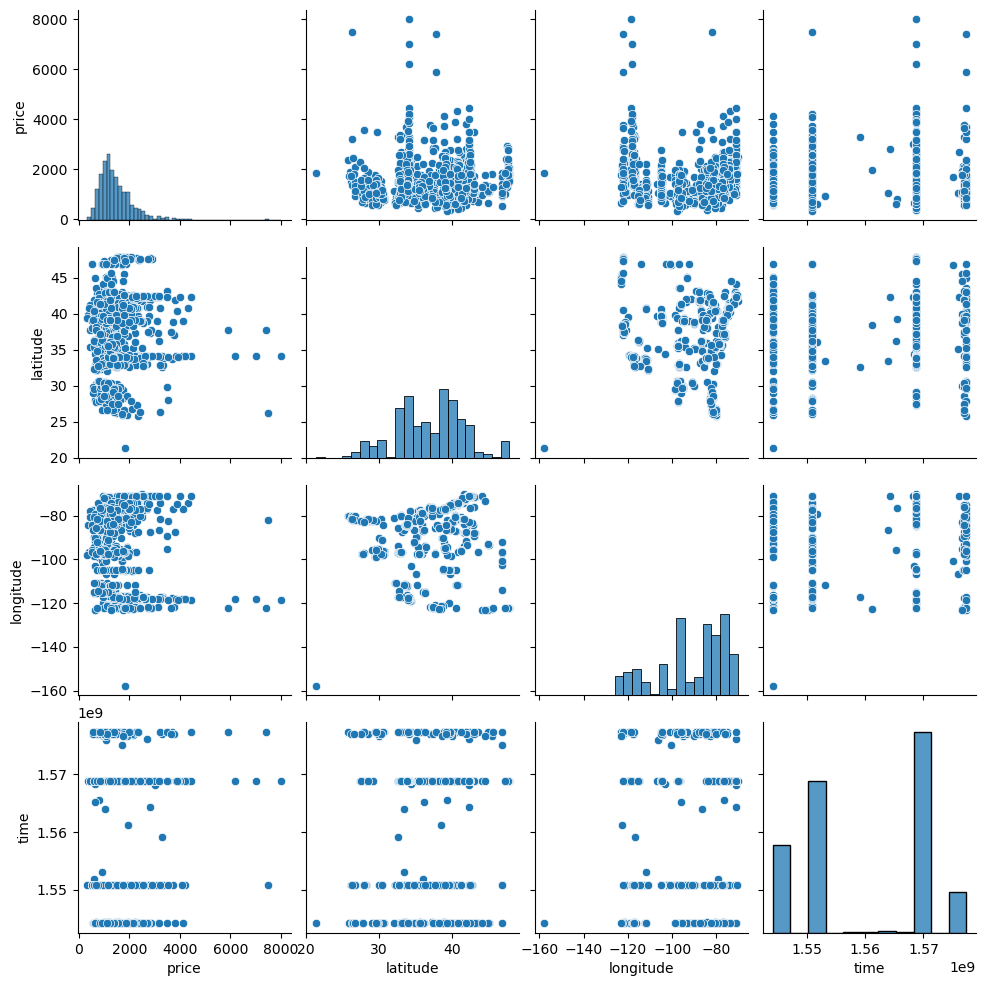

In [21]:
# Sample a portion of the dataset
sampled_df = df.sample(n=1000, random_state=42)  # Adjust the number of samples as needed

# Visualize the distribution of numerical features using a pairplot
sns.pairplot(sampled_df)
plt.show()

### Regression - Distribution of the target variable

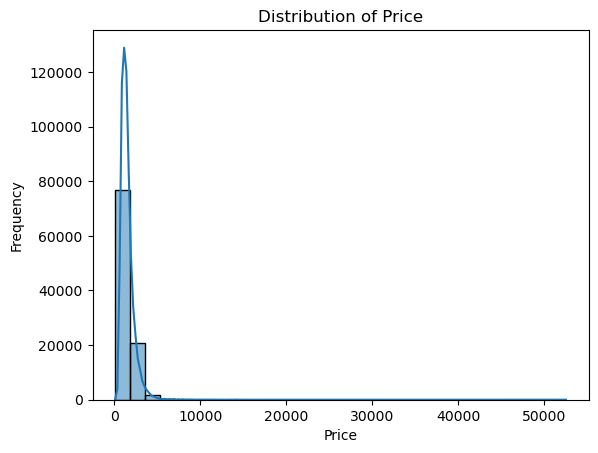

In [22]:
# Visualize the distribution of the target variable (for regression)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Classification - Distribution of the target variable

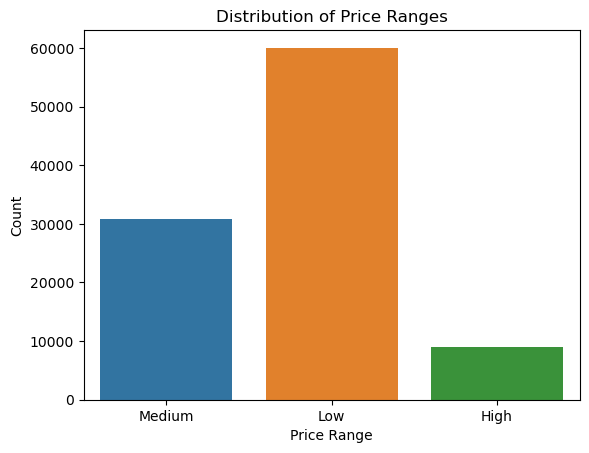

In [23]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert price column to numeric

# Define price ranges
def price_range(price):
    if price < 1500:
        return 'Low'
    elif 1500 <= price < 2500:
        return 'Medium'
    else:
        return 'High'

# Create a new column for price range
df['price_range'] = df['price'].apply(price_range)

# Visualize the distribution of the target variable (for classification)
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

### Correlation Heatmap

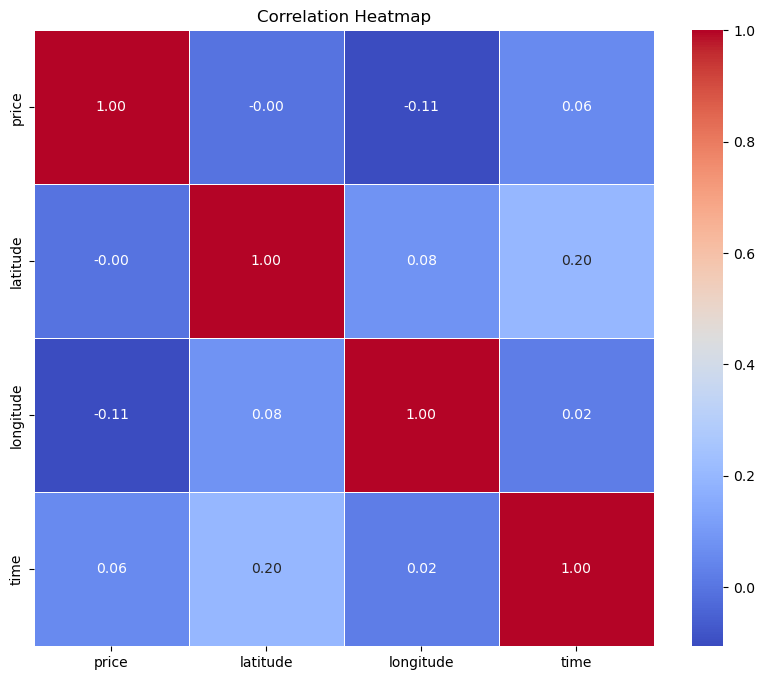

In [25]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

### Missing Values

In [26]:
# Remove rows with any missing values
data_cleaned = df.dropna()

# Print the shape of the cleaned DataFrame to verify the number of rows after removing missing values
print("Shape of the cleaned DataFrame:", data_cleaned.shape)
      
print(data_cleaned.isnull().sum())

Shape of the cleaned DataFrame: (4009, 22)
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
price_range      0
dtype: int64


### Duplicate Values

In [27]:
# Check for duplicate rows
print("Duplicate rows:")
print(data_cleaned[data_cleaned.duplicated()])

Duplicate rows:
Empty DataFrame
Columns: [category, title, body, amenities, bathrooms, bedrooms, currency, fee, has_photo, pets_allowed, price, price_display, price_type, square_feet, address, cityname, state, latitude, longitude, source, time, price_range]
Index: []

[0 rows x 22 columns]


### Remove unwanted column

In [28]:
unwanted_columns = ['category', 'title', 'body', 'currency', 'fee', 'has_photo', 'price_display', 'latitude', 'longitude', 'source', 'time']
data_cleaned = data_cleaned.drop(columns=unwanted_columns, axis=1)

### Create new column

In [29]:
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')  # Convert price column to numeric

# Define price ranges
def price_range(price):
    if price < 1500:
        return 'Low'
    elif 1500 <= price < 2500:
        return 'Medium'
    else:
        return 'High'

# Create a new column for price range
data_cleaned['price_range'] = data_cleaned['price'].apply(price_range)

### Assign Target Variable

In [31]:
# Section 4: Define Target Variables
target_reg = 'price'  # For regression
target_clf = 'price_range'  # For classification

### Scaling Numerical Features

In [32]:
# Section 6: Define Categorical and Numerical Features
categorical_features = ['amenities', 'pets_allowed', 'price_type', 'cityname', 'state']
numeric_features = ['bathrooms', 'bedrooms', 'square_feet']

# Apply StandardScaler to numeric features
scaler = StandardScaler()
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])

### Feature Engineering

In [33]:
data_cleaned['total_rooms'] = data_cleaned['bedrooms'] + data_cleaned['bathrooms']
data_cleaned['total_area'] = data_cleaned['square_feet'] * data_cleaned['bedrooms']
data_cleaned['log_price'] = np.log(data_cleaned['price'] + 1)  # Adding 1 to handle zero values.
data_cleaned['bath_per_bed'] = data_cleaned['bathrooms'] / data_cleaned['bedrooms']
data_cleaned['bed_per_area'] = data_cleaned['bedrooms'] / data_cleaned['total_area']

In [34]:
# Print column names
print("Column Names:", df.columns)

Column Names: Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time', 'price_range'],
      dtype='object')


### Preprocessing Steps

In [36]:
# Section 7: Define Preprocessing Steps
# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Section 8: Combine Preprocessing Steps
# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Section 9: Apply Preprocessing
# Apply preprocessing to the cleaned data
processed_data = preprocessor.fit_transform(data_cleaned)


### Split data for regression

In [37]:
# Section 10: Split Data for Regression
# Split data into train and test sets for regression
X_reg = processed_data
y_reg = data_cleaned[target_reg]
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

### Split data for classification

In [38]:
X_clf = processed_data
y_clf = data_cleaned[target_clf]
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

### Feature selection

In [39]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=10) 
X_reg_train_selected = selector.fit_transform(X_reg_train, y_reg_train)
X_reg_test_selected = selector.transform(X_reg_test)

## Model Building

### Linear Regression

In [40]:
# Train a Linear Regression model
linear_reg_model = LinearRegression(fit_intercept=False)
linear_reg_model.fit(X_reg_train, y_reg_train)

LinearRegression(fit_intercept=False)

In [41]:
# Evaluate the Linear Regression model
linear_reg_train_score = linear_reg_model.score(X_reg_train, y_reg_train)
linear_reg_test_score = linear_reg_model.score(X_reg_test, y_reg_test)

In [42]:
# Calculate predictions for Linear Regression
linear_reg_train_predictions = linear_reg_model.predict(X_reg_train)
linear_reg_test_predictions = linear_reg_model.predict(X_reg_test)

In [53]:
# Calculate metrics for Linear Regression
linear_reg_train_mae = mean_absolute_error(y_reg_train, linear_reg_train_predictions)
linear_reg_train_mse = mean_squared_error(y_reg_train, linear_reg_train_predictions)
linear_reg_train_rmse = np.sqrt(linear_reg_train_mse)

linear_reg_test_mae = mean_absolute_error(y_reg_test, linear_reg_test_predictions)
linear_reg_test_mse = mean_squared_error(y_reg_test, linear_reg_test_predictions)
linear_reg_test_rmse = np.sqrt(linear_reg_test_mse)

# Print metrics for Linear Regression
print("Linear Regression Train MAE:", linear_reg_train_mae)
print("Linear Regression Train MSE:", linear_reg_train_mse)
print("Linear Regression Train RMSE:", linear_reg_train_rmse)

print("Linear Regression Test MAE:", linear_reg_test_mae)
print("Linear Regression Test MSE:", linear_reg_test_mse)
print("Linear Regression Test RMSE:", linear_reg_test_rmse)

Linear Regression Train MAE: 135.76759756284764
Linear Regression Train MSE: 99351.4084076537
Linear Regression Train RMSE: 315.2005844024622
Linear Regression Test MAE: 420.62917379106085
Linear Regression Test MSE: 373793.5605522878
Linear Regression Test RMSE: 611.3865884628872


#### Regularization - Ridge model

In [54]:
# Train a tuned Ridge regression model with hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_reg_train, y_reg_train)
best_alpha = grid_search.best_params_['alpha']
tuned_ridge_model = Ridge(alpha=best_alpha)
tuned_ridge_model.fit(X_reg_train, y_reg_train)
tuned_reg_test_score = tuned_ridge_model.score(X_reg_test, y_reg_test)

In [55]:
# Evaluate the ridge regression model
ridge_train_score = tuned_ridge_model.score(X_reg_train, y_reg_train)
ridge_test_score = tuned_ridge_model.score(X_reg_test, y_reg_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate predictions for Ridge Regression
ridge_train_predictions = tuned_ridge_model.predict(X_reg_train)
ridge_test_predictions = tuned_ridge_model.predict(X_reg_test)

In [57]:
# Calculate metrics for Ridge Regression
ridge_train_mae = mean_absolute_error(y_reg_train, ridge_train_predictions)
ridge_train_mse = mean_squared_error(y_reg_train, ridge_train_predictions)
ridge_train_rmse = np.sqrt(ridge_train_mse)

ridge_test_mae = mean_absolute_error(y_reg_test, ridge_test_predictions)
ridge_test_mse = mean_squared_error(y_reg_test, ridge_test_predictions)
ridge_test_rmse = np.sqrt(ridge_test_mse)

# Print metrics for Ridge Regression
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)

print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)


Ridge Regression Train MAE: 191.800155965706
Ridge Regression Train MSE: 131999.1332740451
Ridge Regression Train RMSE: 363.3168496974027
Ridge Regression Test MAE: 293.35866970832274
Ridge Regression Test MSE: 181296.66019865565
Ridge Regression Test RMSE: 425.78945524596503


In [58]:
# coefficients for linear regression model
coefficients = tuned_ridge_model.coef_
feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(input_features=categorical_features)
all_feature_names = np.concatenate([numeric_features, feature_names])

# DataFrame to display coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
print(coefficients_df)

                                                Feature  Coefficient
0                                             bathrooms   123.472177
1                                              bedrooms    -3.502251
2                                           square_feet   392.624388
3                                          amenities_AC  -172.064347
4     amenities_AC,Alarm,Basketball,Dishwasher,Garba...  -109.888572
...                                                 ...          ...
2500                                           state_UT    82.854679
2501                                           state_VA   381.895416
2502                                           state_WA   358.958440
2503                                           state_WI  -271.855816
2504                                           state_WY  -406.548033

[2505 rows x 2 columns]


### Classification

In [59]:
# Train a classification model using a random forest classifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_clf_train, y_clf_train)

RandomForestClassifier(random_state=42)

In [60]:
# Evaluate the classification model
y_clf_pred = clf_model.predict(X_clf_test)
clf_accuracy = accuracy_score(y_clf_test, y_clf_pred)

# Print the classification accuracy
print("Initial Classification Model Accuracy:", clf_accuracy)

Initial Classification Model Accuracy: 0.8379052369077307


## Results

### Linear Regression - Actual Vs Predicted 

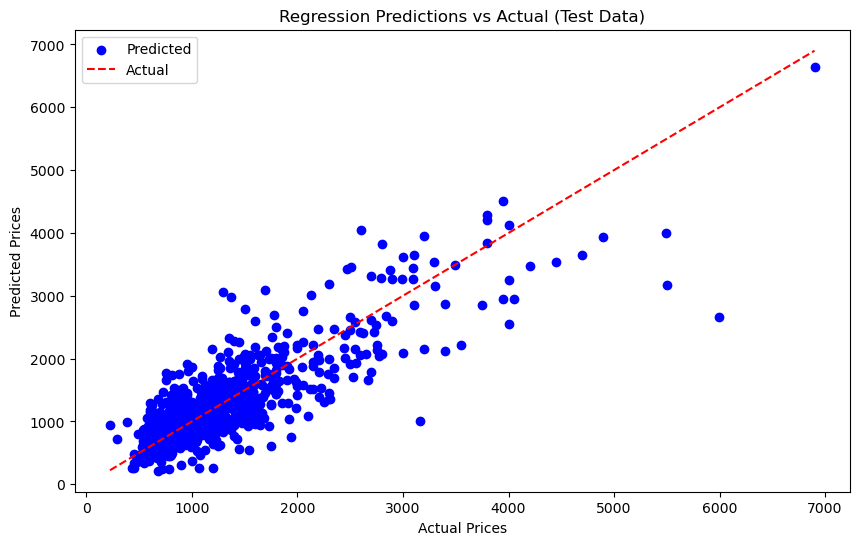

In [61]:
import matplotlib.pyplot as plt

# Plot Regression Predictions vs Actual for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, ridge_test_predictions, color='blue', label='Predicted')
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], linestyle='--', color='red', label='Actual')
plt.title('Regression Predictions vs Actual (Test Data)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

### Classification - Confusion Matrix

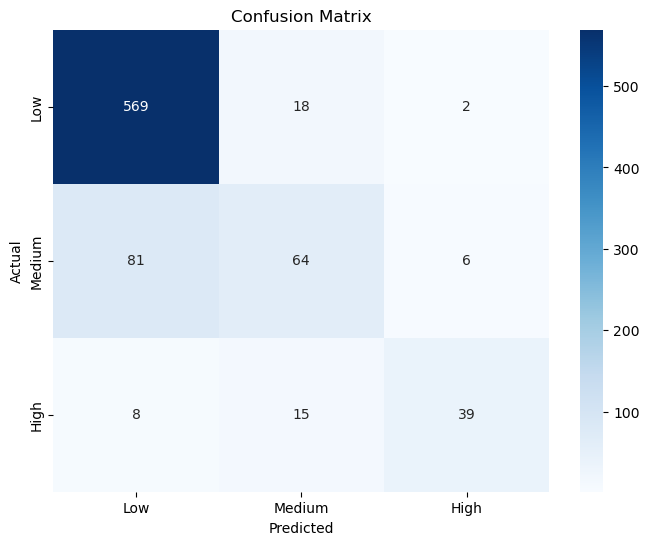

In [62]:
# Calculate confusion matrix
cm = confusion_matrix(y_clf_test, y_clf_pred, labels=['Low', 'Medium', 'High'])

# Plot Confusion Matrix for Classification
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()